In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import os

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

In [ ]:
# Read the labeled test data
df = pd.read_csv('../DATA/data/labeled_test.csv')
print(f"Total number of images: {len(df)}")
df.head()

Total number of images: 706


,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


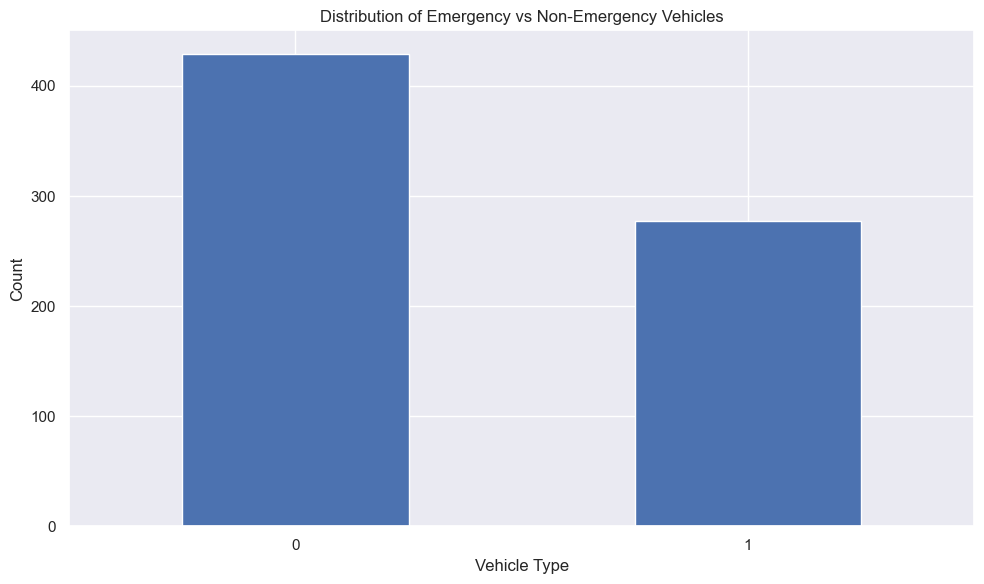

In [10]:
# Create histogram of emergency vs non-emergency vehicles
plt.figure(figsize=(10, 6))
df['emergency_or_not'].value_counts().plot(kind='bar')
plt.title('Distribution of Emergency vs Non-Emergency Vehicles')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

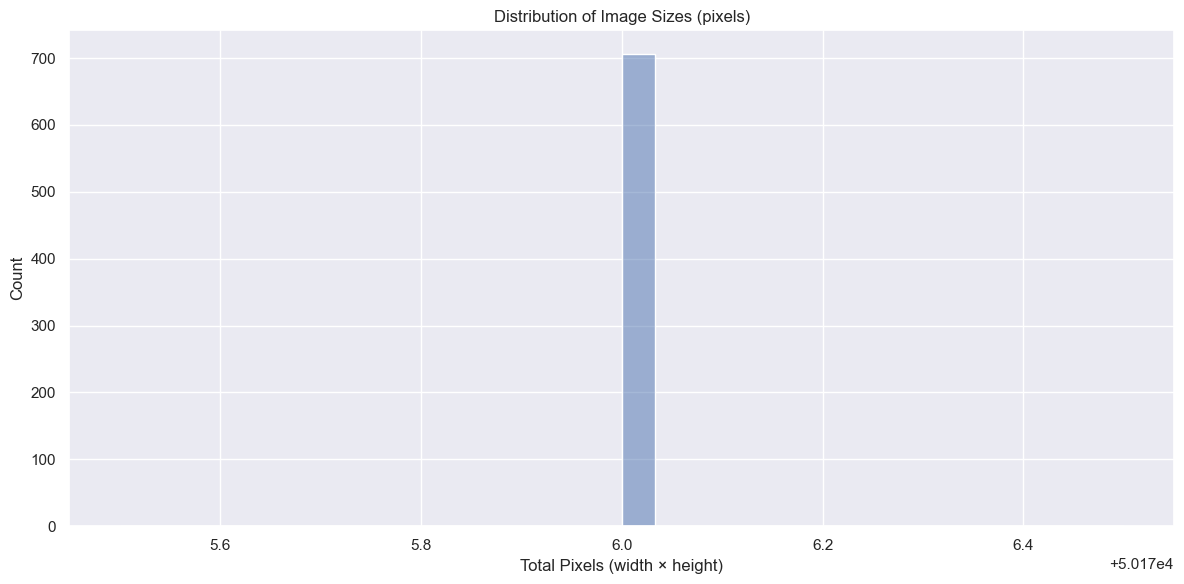

In [11]:
def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size[0] * img.size[1]  # width * height
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Get image sizes
image_sizes = []
for idx, row in df.iterrows():
    image_path = os.path.join('../data/data/images', row['image_names'])
    size = get_image_size(image_path)
    if size:
        image_sizes.append(size)

# Create distribution plot of image sizes
plt.figure(figsize=(12, 6))
sns.histplot(data=image_sizes, bins=30, kde=True)
plt.title('Distribution of Image Sizes (pixels)')
plt.xlabel('Total Pixels (width × height)')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

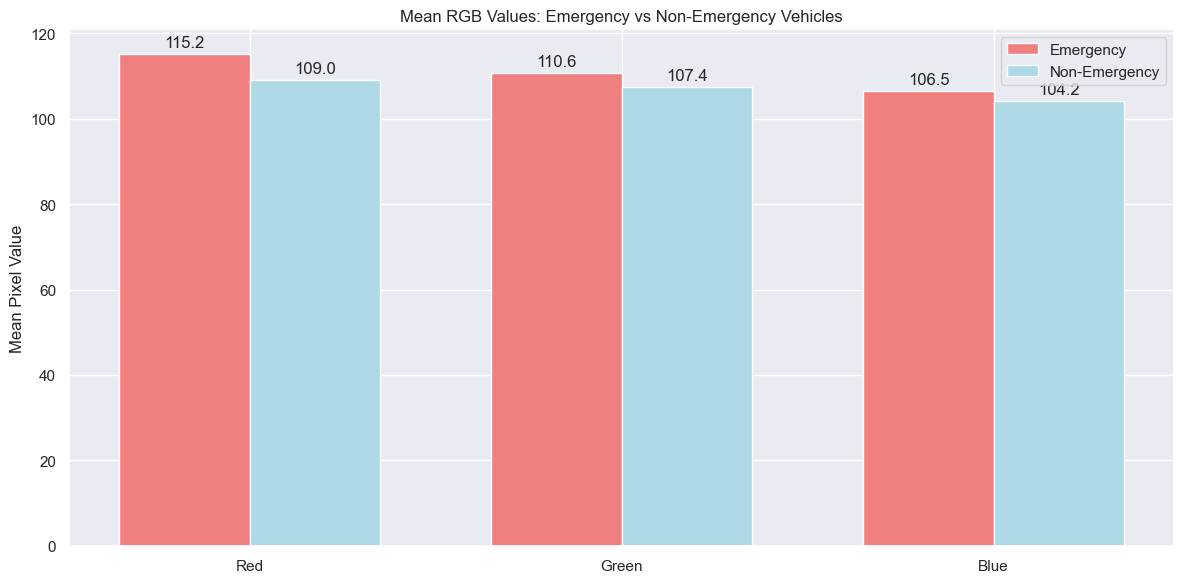


Mean RGB Values Summary:

Emergency Vehicles:
Red: 115.17
Green: 110.61
Blue: 106.49

Non-Emergency Vehicles:
Red: 109.05
Green: 107.37
Blue: 104.19


In [12]:
# Function to get mean RGB values from an image
def get_mean_rgb(image_path):
    try:
        with Image.open(image_path) as img:
            # Convert image to RGB if it isn't already
            img = img.convert('RGB')
            # Convert to numpy array and get mean values
            img_array = np.array(img)
            mean_r = img_array[:,:,0].mean()
            mean_g = img_array[:,:,1].mean()
            mean_b = img_array[:,:,2].mean()
            return mean_r, mean_g, mean_b
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Lists to store RGB values for each class
emergency_rgb = {'R': [], 'G': [], 'B': []}
non_emergency_rgb = {'R': [], 'G': [], 'B': []}

# Process each image
for idx, row in df.iterrows():
    image_path = os.path.join('../data/data/images', row['image_names'])
    rgb_values = get_mean_rgb(image_path)
    
    if rgb_values:
        if row['emergency_or_not'] == 1:  # Emergency vehicle
            emergency_rgb['R'].append(rgb_values[0])
            emergency_rgb['G'].append(rgb_values[1])
            emergency_rgb['B'].append(rgb_values[2])
        else:  # Non-emergency vehicle
            non_emergency_rgb['R'].append(rgb_values[0])
            non_emergency_rgb['G'].append(rgb_values[1])
            non_emergency_rgb['B'].append(rgb_values[2])

# Calculate means for plotting
emergency_means = [np.mean(emergency_rgb['R']), 
                  np.mean(emergency_rgb['G']), 
                  np.mean(emergency_rgb['B'])]
non_emergency_means = [np.mean(non_emergency_rgb['R']), 
                      np.mean(non_emergency_rgb['G']), 
                      np.mean(non_emergency_rgb['B'])]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars and positions of the bars
width = 0.35
x = np.arange(3)  # the label locations

# Create bars
rects1 = ax.bar(x - width/2, emergency_means, width, label='Emergency', color='lightcoral')
rects2 = ax.bar(x + width/2, non_emergency_means, width, label='Non-Emergency', color='lightblue')

# Customize the plot
ax.set_ylabel('Mean Pixel Value')
ax.set_title('Mean RGB Values: Emergency vs Non-Emergency Vehicles')
ax.set_xticks(x)
ax.set_xticklabels(['Red', 'Green', 'Blue'])
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nMean RGB Values Summary:")
print("\nEmergency Vehicles:")
print(f"Red: {emergency_means[0]:.2f}")
print(f"Green: {emergency_means[1]:.2f}")
print(f"Blue: {emergency_means[2]:.2f}")
print("\nNon-Emergency Vehicles:")
print(f"Red: {non_emergency_means[0]:.2f}")
print(f"Green: {non_emergency_means[1]:.2f}")
print(f"Blue: {non_emergency_means[2]:.2f}")